# Non paraxial phase

$$ \Delta(x,y) = R_{1}\left(1 - \frac{|\xi_{+}|^{2}}{R_{1}^{2}} \right)^{1/2} - R_{2}\left(1 - \frac{|\xi_{+}|^{2}}{R_{2}^{2}} \right)^{1/2} + R_{2}\left(1 - \frac{|\xi_{-}|^{2}}{R_{2}^{2}} \right)^{1/2} - R_{1}\left(1 - \frac{|\xi_{-}|^{2}}{R_{1}^{2}} \right)^{1/2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
%matplotlib widget

In [2]:
def phase_3D(x,y, r1, r2,wa, n):
    norm2 = (x ** 2) + (y ** 2)
    phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
    phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))
    phase_12 = phase_1 + phase_2
    
    k = ((2*np.pi)/wa)
    #n = 1.5
    
    # fase paraxial
    phase_parax = np.exp(1j*(n -1)*k*(-norm2)* ((1/r1)- (1/r2)) )
    phase_parax = np.exp(1j*(n -1)*k*(-norm2)* ((1/r1)- (1/r2)) )
    phase_parax = np.real(phase_parax)
    
    #fase no paraxial
    phase_im = np.exp(1j*(n -1)*k*phase_12)
    phase = np.real(phase_im)
    phase = np.nan_to_num(phase, nan = -1)
    return phase

## Modelamiento de la fase

In [3]:
w = 400 * (10 ** -9)
r1 = 4*w
r2 = -5*w
r1, r2

(1.6000000000000001e-06, -2.0000000000000003e-06)

In [4]:
%%time
square = np.linspace(-4*w, 4*w, 2000)
square_big = np.linspace(-400*w, 400*w, 2000)

xx,yy = np.meshgrid(square, square)
xx_big,yy_big = np.meshgrid(square_big, square_big)

zz = np.array(list(phase_3D(xx,yy,r1,r2,w,n=1.5)), dtype=float)
zz_big = np.array(list(phase_3D(xx_big,yy_big,r1*100,r2*100,w,n=1.5)), dtype=float)

/tmp/ipykernel_8141/247180085.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_8141/247180085.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


CPU times: user 829 ms, sys: 159 ms, total: 988 ms
Wall time: 985 ms


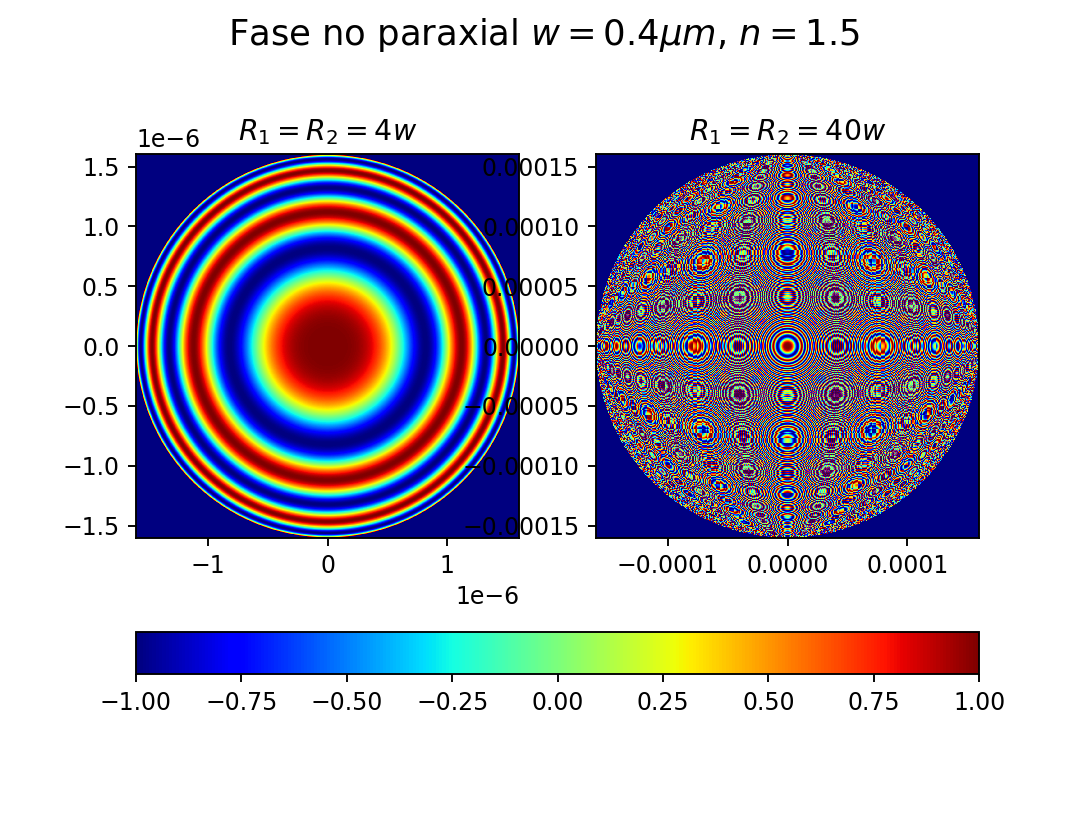

In [5]:
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, ax = plt.subplots(ncols = 2, dpi=170, subplot_kw={'aspect': 'equal'})
c = ax[0].pcolormesh(xx, yy, zz, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax[0].set_title(r'$ R_{1} = R_{2} = 4w $', size = 12)

ax[1].pcolormesh(xx_big, yy_big, zz_big, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax[1].set_title(r'$ R_{1} = R_{2} = 40w $', size = 12)

fig.suptitle(r'Fase no paraxial $w = 0.4 \mu m $, $n = 1.5$', size = 15)

fig.colorbar(c, ax = ax, orientation = 'horizontal')
#plt.savefig('NonParaxialPhase_w0.4_n1.5.png')

plt.show()

## Limite de enfoque

In [6]:
wn = 400 * (10 ** -9)
rn1 = 0.7*wn
rn2 = -0.7*wn
rn1, rn2

(2.8e-07, -2.8e-07)

In [7]:
%%time
square = np.linspace(-0.7*wn, 0.7*wn, 2000)
square_big = np.linspace(-400*wn, 400*wn, 2000)

xx,yy = np.meshgrid(square, square)

zz = np.array(list(phase_3D(xx,yy,rn1,rn2,wn,n=1.5)), dtype=float)

/tmp/ipykernel_8141/247180085.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_8141/247180085.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


CPU times: user 407 ms, sys: 114 ms, total: 521 ms
Wall time: 519 ms


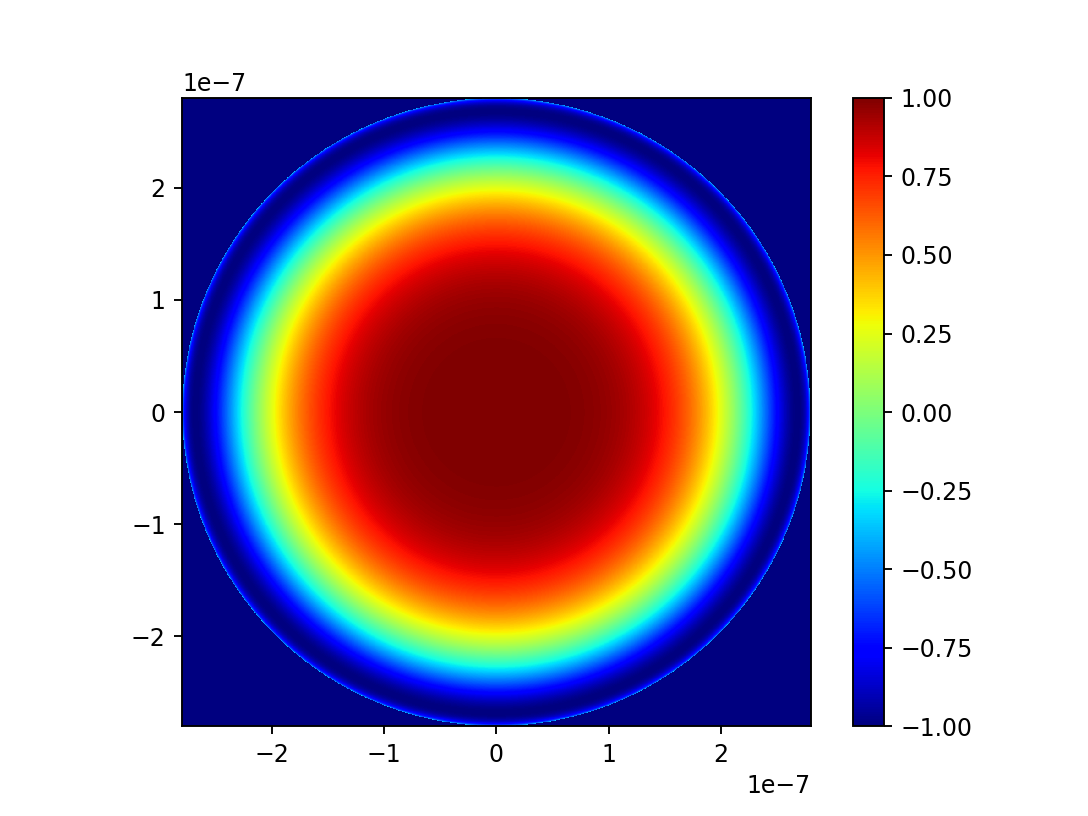

In [8]:
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, ax = plt.subplots(dpi=170, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='jet',  vmin = z_mi, vmax = z_ma)


fig.colorbar(c, ax = ax, orientation = 'vertical')
#plt.savefig('aFresnel.png')

plt.show()

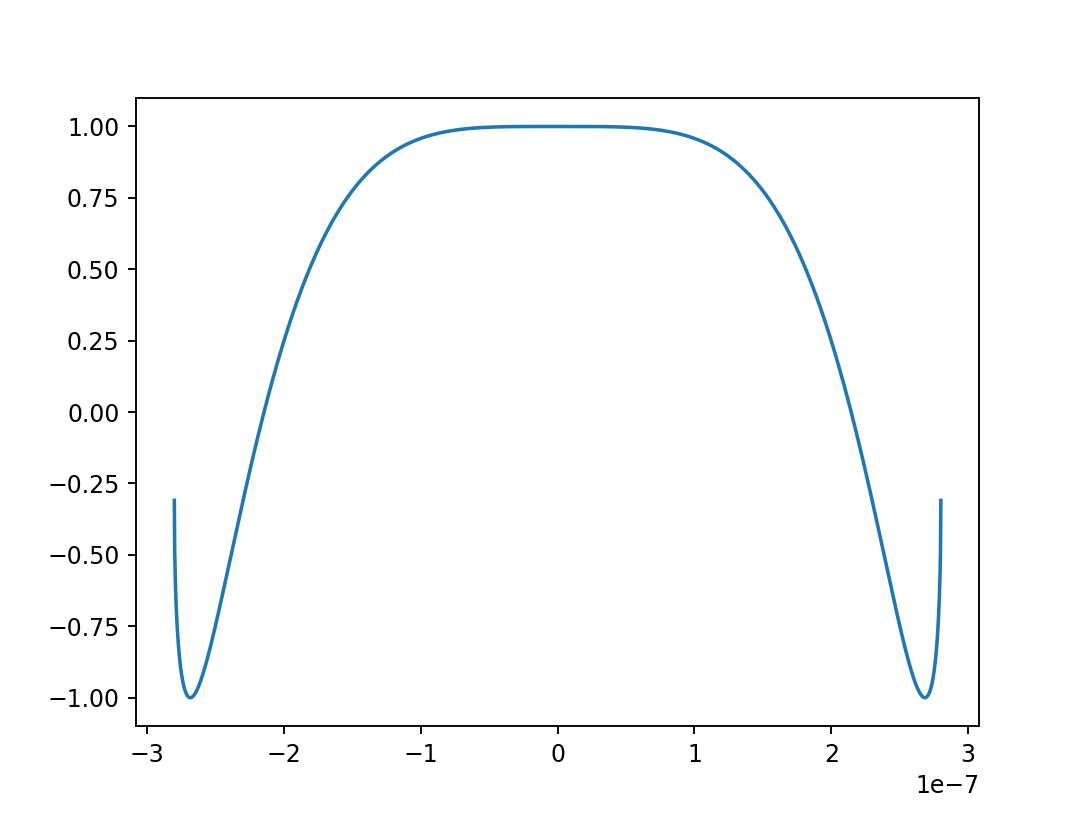

In [9]:
x_2d = np.linspace(-0.7*wn, 0.7*wn, 2000)
z_2d = phase_3D(x_2d,0,rn1,rn2,wn,n=1.5)

fig, ax = plt.subplots(dpi=170)

ax.plot(x_2d, z_2d)

#plt.savefig('bFresnel.png')

plt.show()

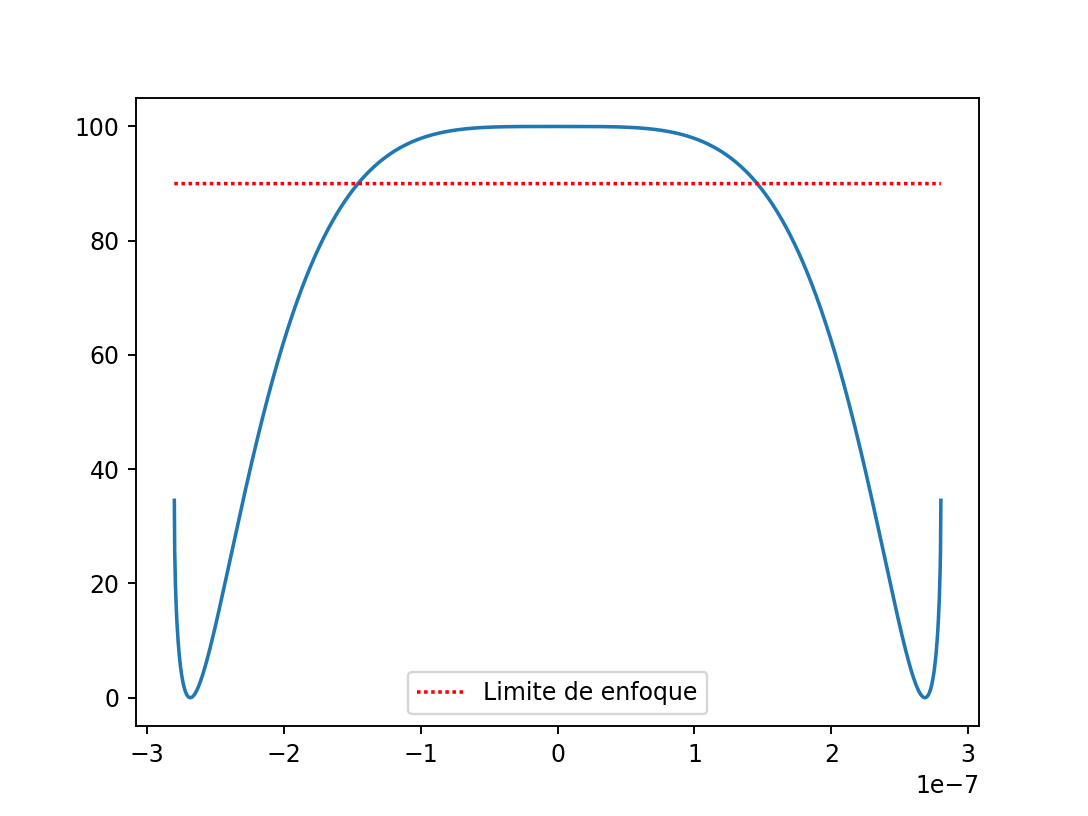

In [10]:
z2d_Max,  z2d_Min= np.max(z_2d+1), np.min(z_2d+1)
porcentaje_comparación = (((z_2d+1) - z2d_Min)/z2d_Max) * 100
porcentaje90 = np.ones((2000,1))*90

fig, ax = plt.subplots(dpi=170)

ax.plot(x_2d, porcentaje_comparación)
ax.plot(x_2d, porcentaje90, dashes = (1,1), color = 'red', label = 'Limite de enfoque')
ax.legend()
#plt.savefig('dFresnel.png')

plt.show()

In [11]:
np.where(porcentaje_comparación == 90)
np.where(np.round(z_2d*100,0) == 0)
z_2d[233]

-0.004709343344733026

/tmp/ipykernel_8141/1989529787.py:3: RuntimeWarning: invalid value encountered in sqrt
  y_r = np.sqrt(x_2d[480]**2-x_2d**2)


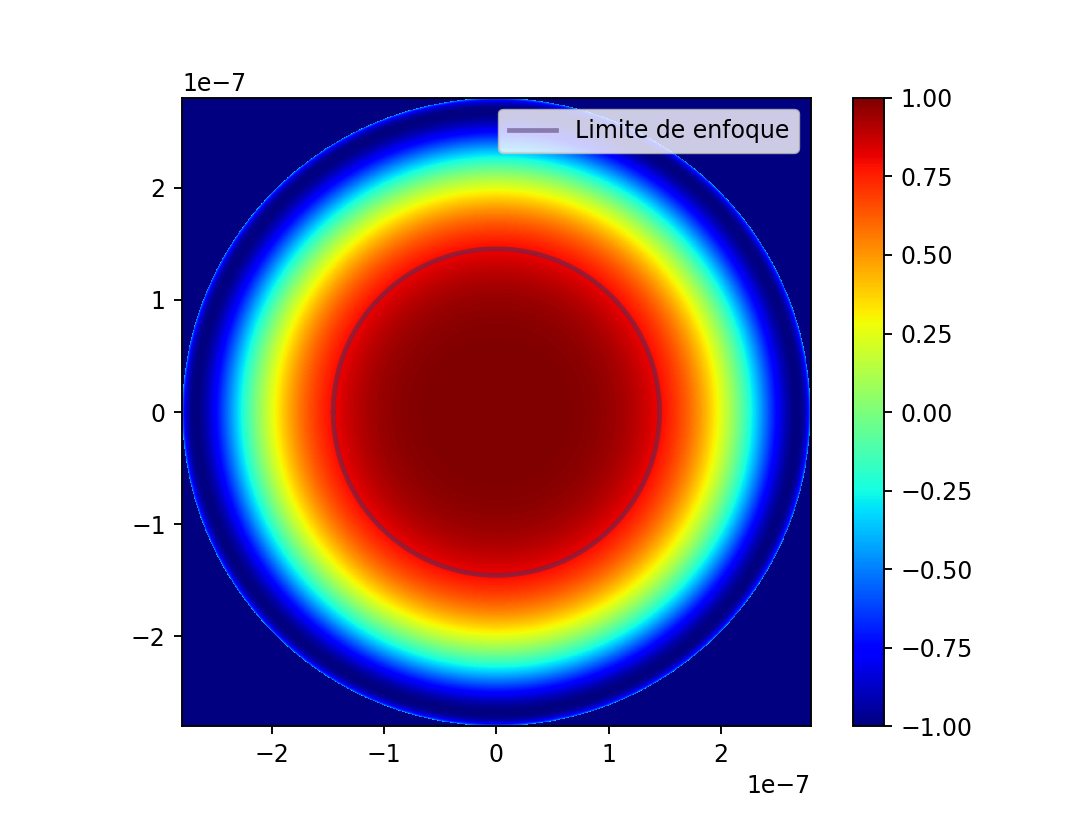

In [12]:
z_mi, z_ma = zz.min()/1, zz.max()/1

y_r = np.sqrt(x_2d[480]**2-x_2d**2)
eq21 = np.concatenate(( np.flip(y_r), -y_r ))
x21  = np.concatenate(( np.flip(x_2d), x_2d ))

fig, ax = plt.subplots(dpi=170, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax.plot(  x21  , eq21, lw=2, alpha=0.5, color = '#452c63', label = 'Limite de enfoque')

ax.legend()
fig.colorbar(c, ax = ax, orientation = 'vertical')
#plt.savefig('cFresnel.png')

plt.show()

In [13]:
Area_focus_lim = np.pi * (x_2d[480]**2)
Area_Fresnel1= (x_2d[233]**2) * np.pi
(Area_focus_lim / Area_Fresnel1) * 100

45.9353241515534

## Zonas de igual fase

In [14]:
wn = 400 * (10 ** -9)
rn1 = 4*wn
rn2 = -4*wn
rn1, rn2

(1.6000000000000001e-06, -1.6000000000000001e-06)

In [15]:
%%time
square = np.linspace(-4*wn, 4*wn, 2000)

xx,yy = np.meshgrid(square, square)

zz = np.array(list(phase_3D(xx,yy,rn1,rn2,wn,n=1.5)), dtype=float)

# equifase 1
xPhase_1 = np.linspace(-1*wn, 1*wn, 200)
yPhase_1 = np.sqrt( (xPhase_1[0]**2) - xPhase_1**2 )

xPhase_1 = np.concatenate(( np.flip(xPhase_1), xPhase_1 ))
yPhase_1 = np.concatenate(( np.flip(yPhase_1), -yPhase_1 ))

# equifase 2
xPhase_2 = np.linspace(-2*wn, 2*wn, 200)
yPhase_2 = np.sqrt( (xPhase_2[0]**2) - xPhase_2**2 )

xPhase_2 = np.concatenate(( np.flip(xPhase_2), xPhase_2 ))
yPhase_2 = np.concatenate(( np.flip(yPhase_2), -yPhase_2 ))

/tmp/ipykernel_8141/247180085.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_8141/247180085.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


CPU times: user 392 ms, sys: 72.8 ms, total: 464 ms
Wall time: 461 ms


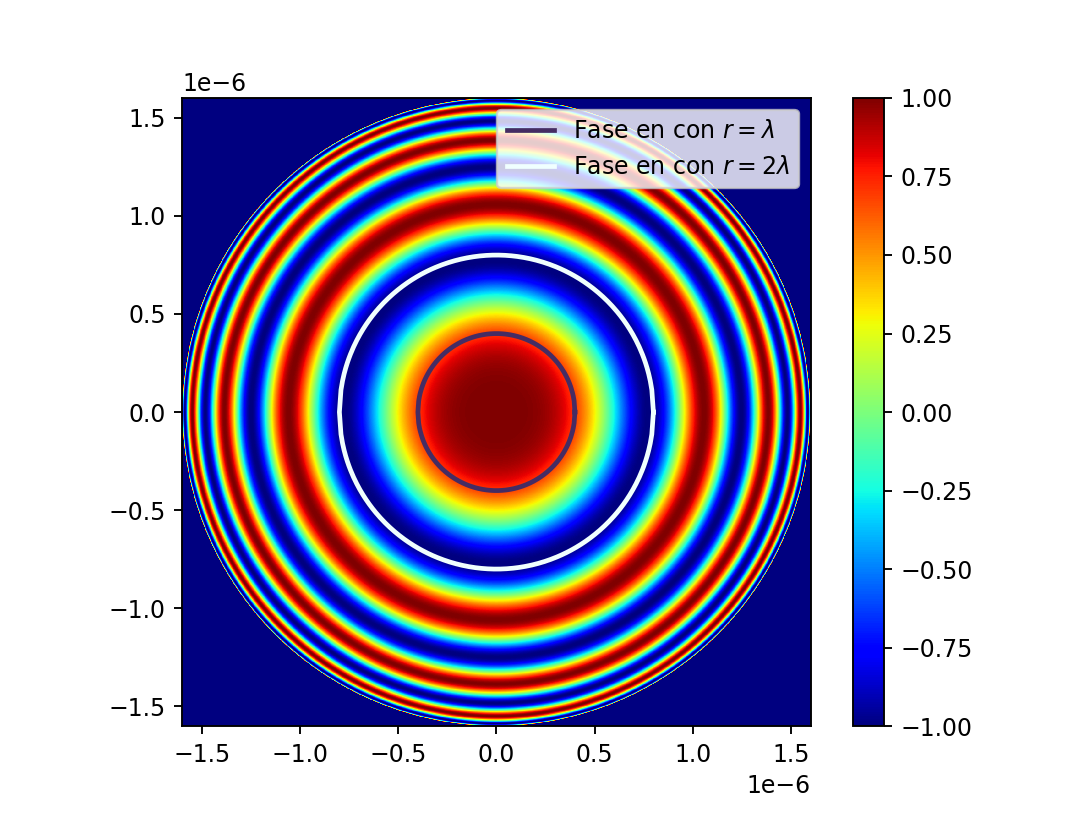

In [18]:
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, ax = plt.subplots(dpi=170, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax.plot(  xPhase_1  , yPhase_1, lw=2, alpha=1, color = '#452c63', label = r'Fase en con $r=\lambda$')
ax.plot(  xPhase_2  , yPhase_2, lw=2, alpha=1, color = '#F0FFFF', label = r'Fase en con $r=2\lambda$')

ax.legend()
fig.colorbar(c, ax = ax, orientation = 'vertical')
plt.savefig('Equifase.png')

plt.show()

## Fuentes puntuales

## Caracterización del foco

## Posición del foco

/tmp/ipykernel_8141/247180085.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_8141/247180085.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


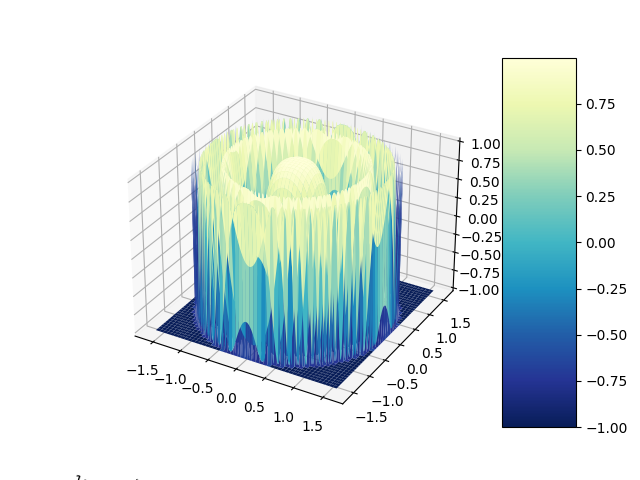

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
square = np.linspace(-4*w, 4*w, 2000)
X = square
Y = square
X, Y = np.meshgrid(X, Y)
Z =phase_3D(xx,yy,r1,r2,w,n=1.5)

#np.nan_to_num(Z, nan = 0)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Customize the z axis.
ax.set_zlim(Z.min(), Z.max())
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=5)

plt.show()